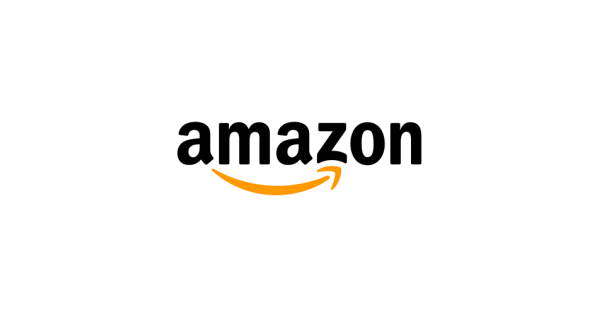

# What is Amazon?
Amazon.com, Inc. is an American multinational technology company which focuses on e-commerce, cloud computing, digital streaming, and artificial intelligence. It is one of the Big Five companies in the U.S. information technology industry, along with Google, Apple, Microsoft, and Facebook. The company has been referred to as "one of the most influential economic and cultural forces in the world", as well as the world's most valuable brand.

# Data Description
This dataset provides the history of daily prices of Amazon stock (AMZN). All the column descriptions are provided.

## import libraries 

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.preprocessing import LabelEncoder,StandardScaler,RobustScaler
from sklearn.linear_model import LinearRegression,Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor,RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import LinearSVR

In [3]:
data = pd.read_csv("AMZN.csv")
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-01-02,312.579987,314.750000,306.959991,308.519989,308.519989,2783200
1,2015-01-05,307.010010,308.380005,300.850006,302.190002,302.190002,2774200
2,2015-01-06,302.239990,303.000000,292.380005,295.290009,295.290009,3519000
3,2015-01-07,297.500000,301.279999,295.329987,298.420013,298.420013,2640300
4,2015-01-08,300.320007,303.140015,296.109985,300.459991,300.459991,3088400
...,...,...,...,...,...,...,...
1252,2019-12-23,1788.260010,1793.000000,1784.510010,1793.000000,1793.000000,2136400
1253,2019-12-24,1793.810059,1795.569946,1787.579956,1789.209961,1789.209961,881300
1254,2019-12-26,1801.010010,1870.459961,1799.500000,1868.770020,1868.770020,6005400
1255,2019-12-27,1882.920044,1901.400024,1866.010010,1869.800049,1869.800049,6186600


In [4]:
data.shape

(1257, 7)

# <center> EDA 

In [5]:
# information of the table
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1257 entries, 0 to 1256
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1257 non-null   object 
 1   Open       1257 non-null   float64
 2   High       1257 non-null   float64
 3   Low        1257 non-null   float64
 4   Close      1257 non-null   float64
 5   Adj Close  1257 non-null   float64
 6   Volume     1257 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 68.9+ KB


In [6]:
## Close and Adj Close columns are showing same value so lets drop the column

data.drop(columns="Adj Close",inplace=True)

In [7]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Open,1257.0,1.114915e+03,5.323224e+02,286.279999,6.655900e+02,9.713100e+02,1.680000e+03,2.038110e+03
High,1257.0,1.124904e+03,5.368572e+02,290.790009,6.747800e+02,9.759500e+02,1.699900e+03,2.050500e+03
Low,1257.0,1.102968e+03,5.262431e+02,285.250000,6.593200e+02,9.609100e+02,1.661170e+03,2.013000e+03
Close,1257.0,1.114464e+03,5.317384e+02,286.950012,6.647900e+02,9.678000e+02,1.674560e+03,2.039510e+03
Volume,1257.0,4.191475e+06,2.251226e+06,881300.000000,2.741300e+06,3.578200e+06,4.873900e+06,2.385610e+07


In [8]:
# checking nan values of the data set
data.isnull().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

In [9]:
# checking duplicate values in the data
data.duplicated().sum()

0

# <center> GRAPHICAL VISUALIZATION

## univariate Analysis 

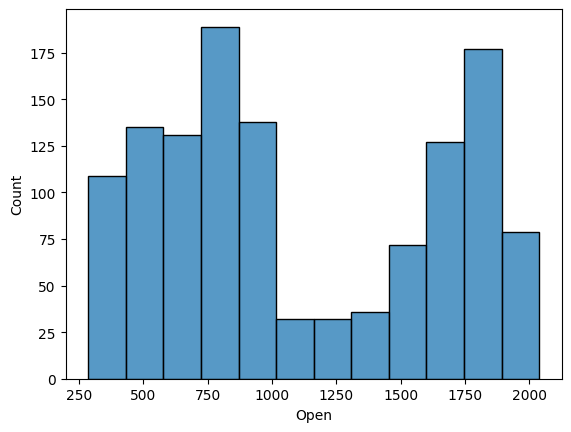

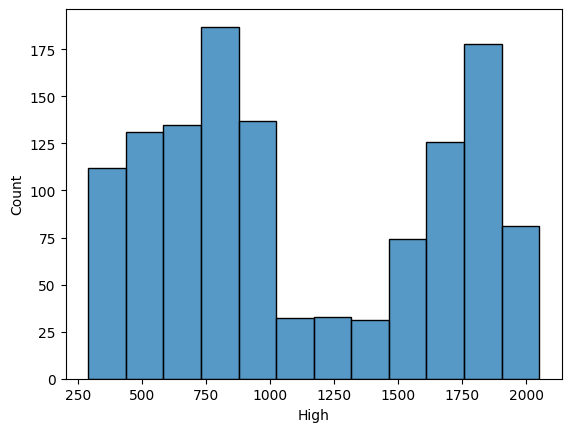

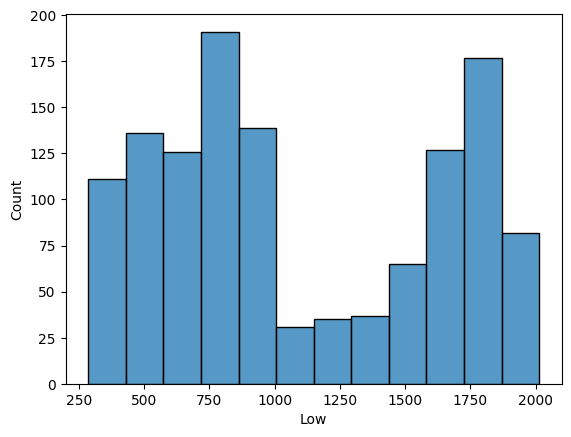

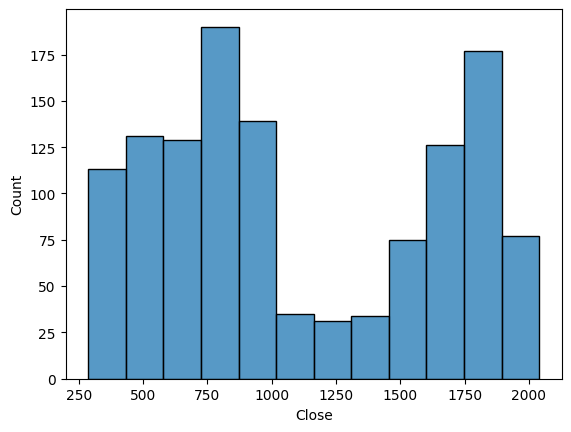

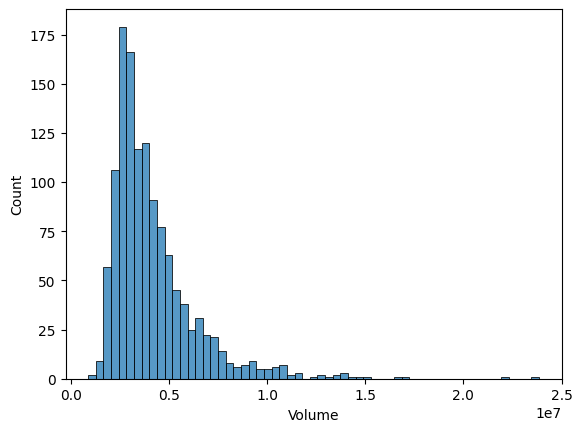

In [10]:
for i in data.columns:
    if data[i].dtypes!="object":
        sns.histplot(x=data[i])
        plt.show()

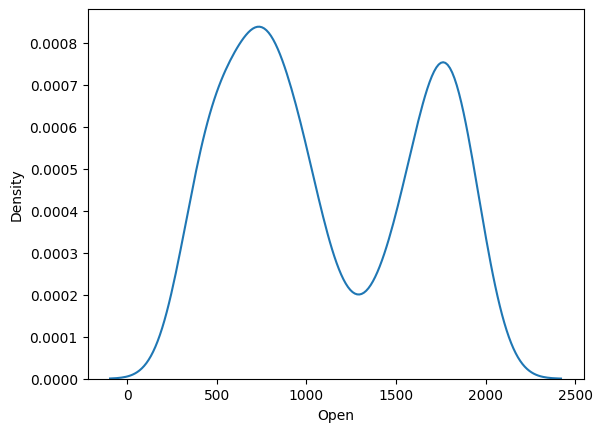

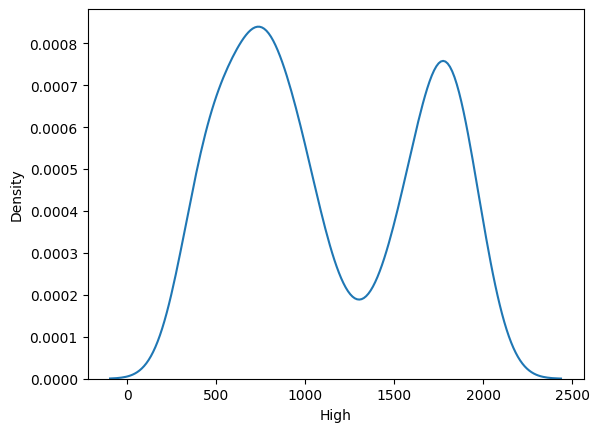

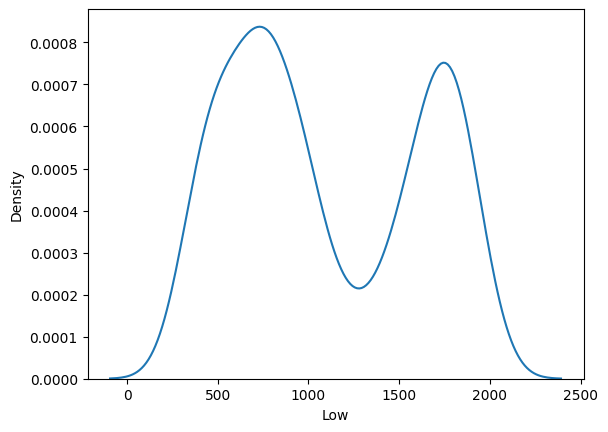

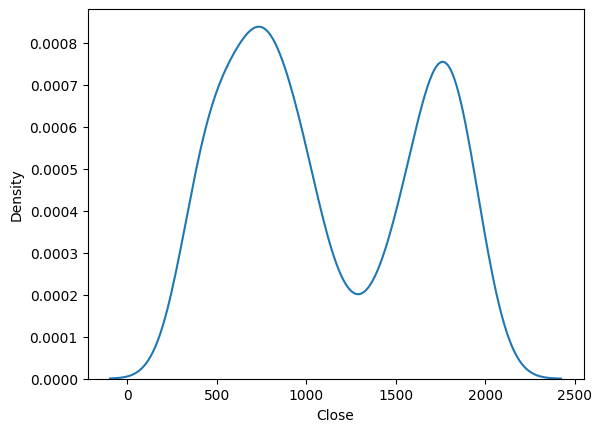

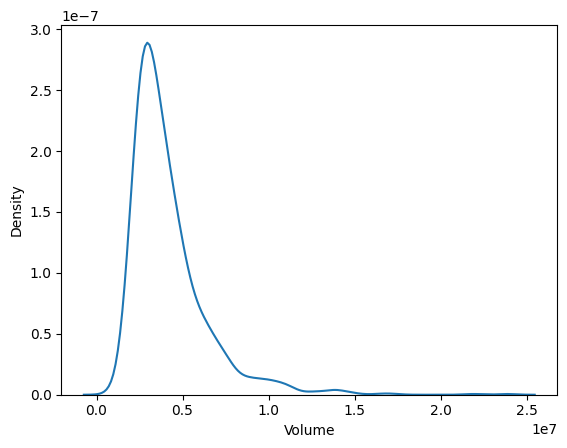

In [11]:
for i in data.columns:
    if data[i].dtypes!="object":
        sns.kdeplot(x=data[i])
        plt.show()

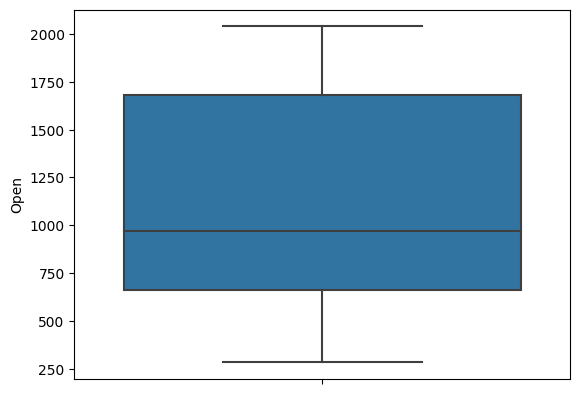

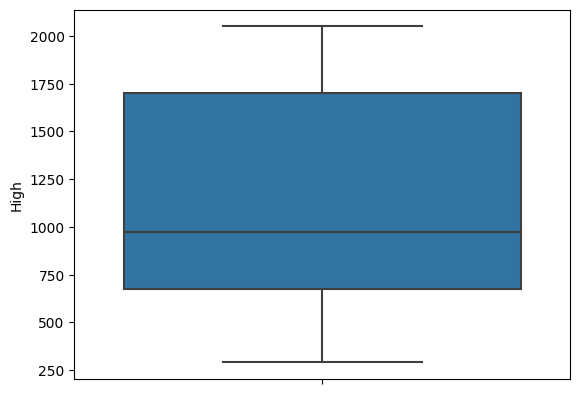

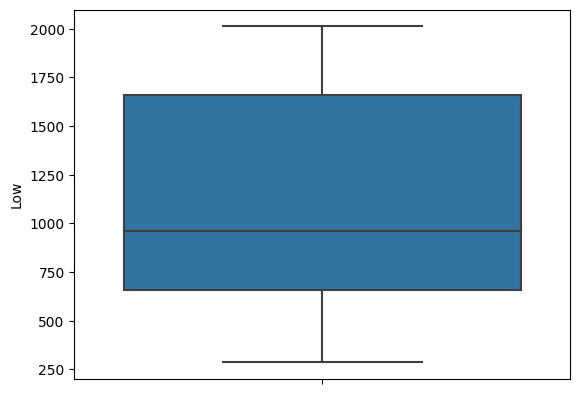

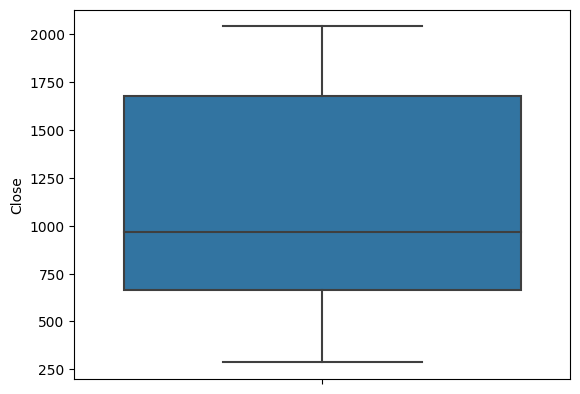

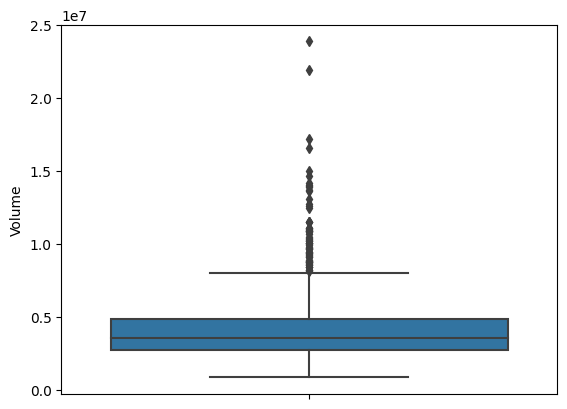

In [12]:
for i in data.columns:
    if data[i].dtype!="object":
        sns.boxplot(y=data[i])
        plt.show();

##  multi variate analysis

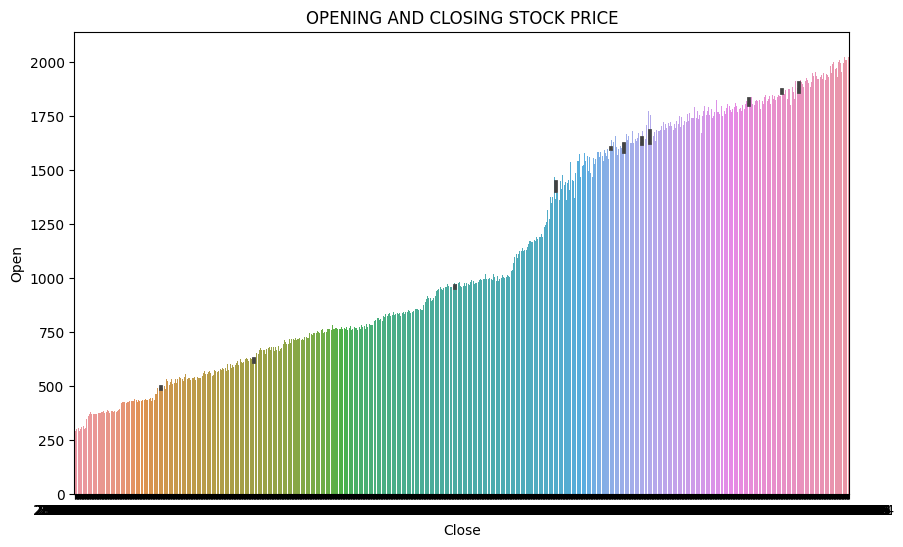

In [13]:
# opening and closing price of stock

plt.figure(figsize=(10,6))
sns.set_color_codes()
sns.set_palette("Oranges_r")
plt.title('OPENING AND CLOSING STOCK PRICE')
sns.barplot(x="Close",y="Open",data=data.sort_values(by="Date",ascending=False));

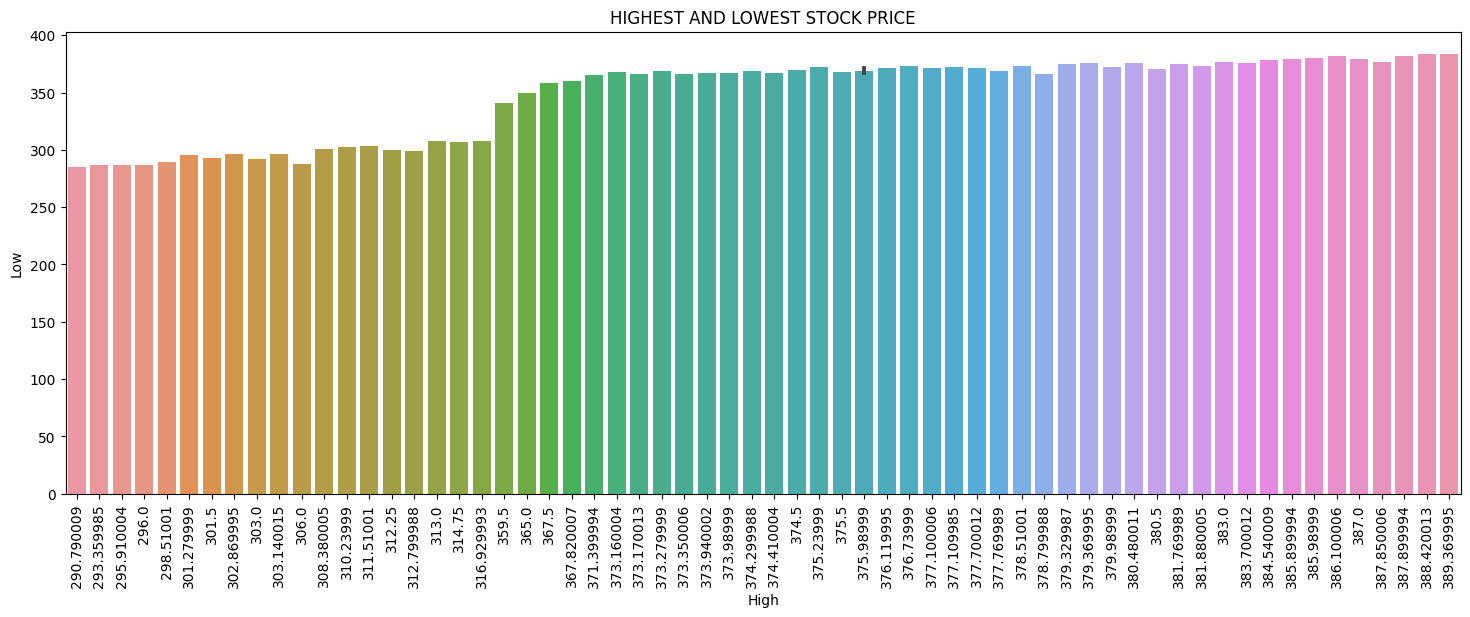

In [14]:
# highest and lowest stock price of last two months (01-10-2019 to 30-12-2019)
plt.figure(figsize=(18,6))
plt.title('HIGHEST AND LOWEST STOCK PRICE')
plt.xticks(rotation=90)
sns.barplot(x="High",y="Low",data=data.sort_values(by="Date",ascending=False)[1194:]);

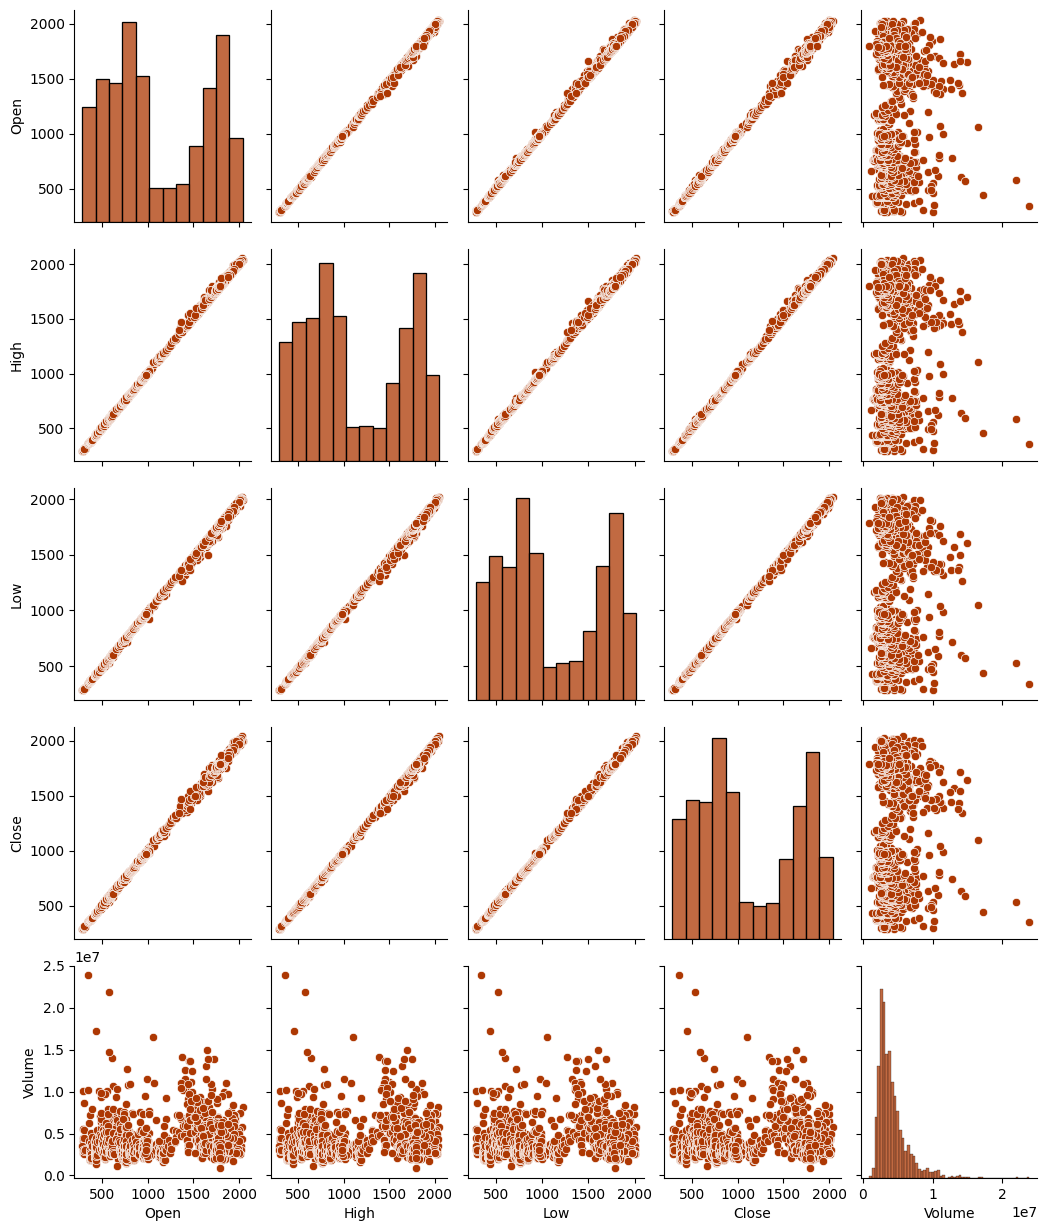

In [15]:
# pairplot of the data set
sns.pairplot(data=data,aspect=.85);

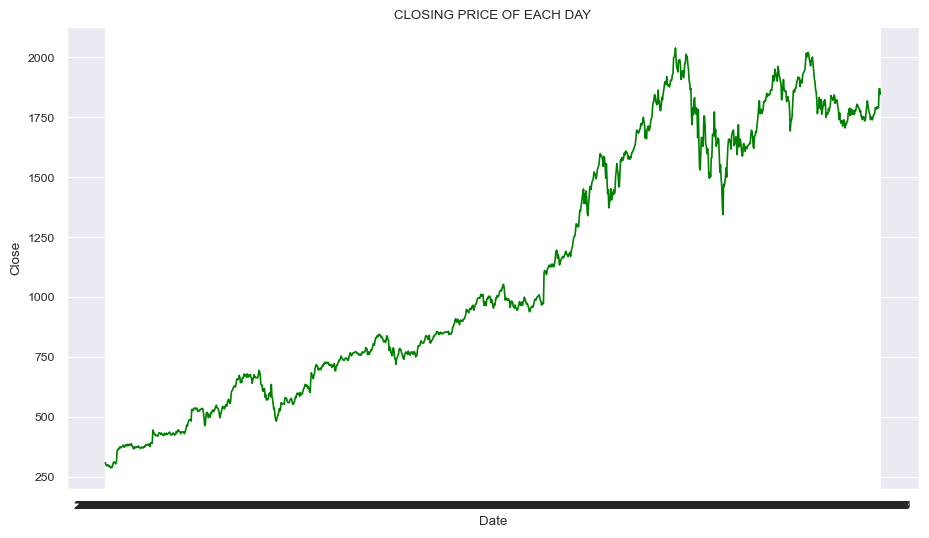

In [33]:
# closing stock price of each day
plt.figure(figsize=(11,6))
sns.set_style('dark')
sns.set_theme('paper')
sns.lineplot("Date","Close",data=data.sort_values(by='Date',ascending=True),color="green"[0:5])
plt.title("CLOSING PRICE OF EACH DAY")
plt.show();

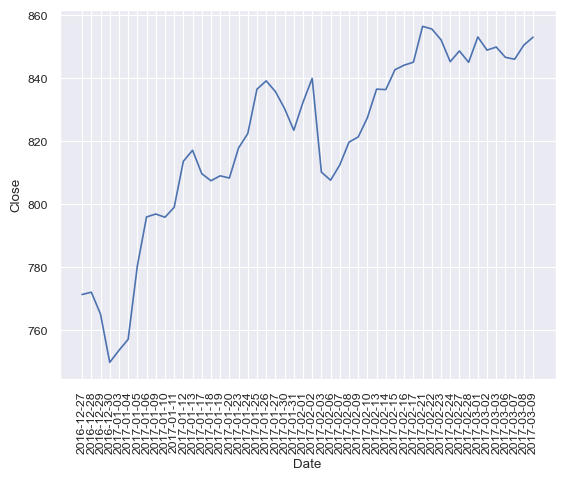

In [32]:
#setting limit of line plot between 500:550
sns.lineplot(x='Date',y='Close',data=data[500:550]);
plt.xticks(rotation=90)
plt.show()

In [50]:
# checking the null values
data.isnull().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

# checking correlation with target

In [35]:
data.corr()

,Open,High,Low,Close,Volume
Open,1.000000,0.999776,0.999636,0.999419,0.130512
High,0.999776,1.000000,0.999547,0.999704,0.138378
Low,0.999636,0.999547,1.000000,0.999737,0.117293
Close,0.999419,0.999704,0.999737,1.000000,0.126983
Volume,0.130512,0.138378,0.117293,0.126983,1.000000


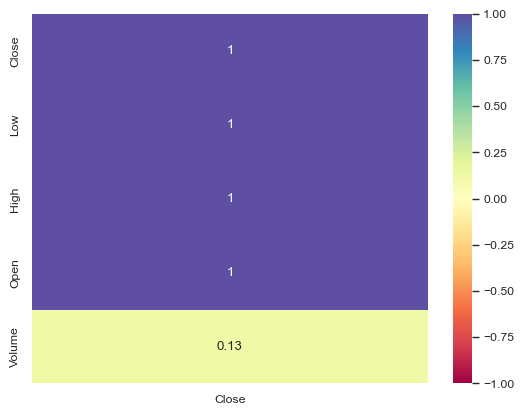

In [51]:
## PLOTING HEAT MAP TO FIND THE RELATION BETWEEN THE TARGET OF OTHER COLUMNS
sns.heatmap(data.corr()[["Close"]].sort_values(by="Close",ascending=False),vmin=-1,vmax=1,annot=True,cmap="Spectral");

In [37]:
x=data[["Low","High","Open"]].values
y=data[["Close"]].values

In [38]:
## INSERT STANDARD SCALER INTO A VARIABLE CALLED SC
sc=StandardScaler()

In [39]:
##fitting transform
x=sc.fit_transform(x)

In [40]:
### TRAIN TEST SPLIT
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)  

In [41]:
## THEIR CROSS VALIDATE THE MODELS ,WHICH IS GOING TO HAVE THE BEST RMSE
models = {
    "LinearRegression": LinearRegression(),
    "Ridge":Ridge(),
    "LinearSVR":LinearSVR(),
    "DecisionTreeRegressor":DecisionTreeRegressor(),
    "GradientBoostingRegressor":GradientBoostingRegressor(),
    "AdaBoostRegressor":AdaBoostRegressor(),
    "RandomForestRegressor":RandomForestRegressor()
}

In [42]:
for name,model in models.items():
    model.fit(x_train,y_train)
    print('model trained with {}'.format(name))
    training_score=model.score(x_train,y_train)*100
    testing_score=model.score(x_test,y_test)*100
    score=r2_score(y_test,model.predict(x_test))*100
    mae=mean_absolute_error(y_test,model.predict(x_test))
    mse=mean_squared_error(y_test,model.predict(x_test))
    rmse=np.sqrt(mse)
    print("r2score:",score)
    print('training_score:',training_score)
    print('testing_score:',testing_score)
    print('mae:',mae)
    print('mse:',mse)
    print("rmse_test:",rmse)
    print("*"*100)

model trained with LinearRegression
r2score: 99.97734321092089
training_score: 99.98338771010647
testing_score: 99.97734321092089
mae: 5.1747020615418124
mse: 62.84848253413322
rmse_test: 7.927703484246445
****************************************************************************************************
model trained with Ridge
r2score: 99.94427759592169
training_score: 99.9621173869185
testing_score: 99.94427759592169
mae: 7.770451371099144
mse: 154.57038185099245
rmse_test: 12.432633745550154
****************************************************************************************************
model trained with LinearSVR
r2score: 74.54825553852595
training_score: 76.64982531532733
testing_score: 74.54825553852595
mae: 219.1887336679002
mse: 70601.50984611611
rmse_test: 265.70944628694724
****************************************************************************************************
model trained with DecisionTreeRegressor
r2score: 99.90868244606418
training_score: 100.0
testing

In [44]:
# SELECTING MODEL THAT WHICH HAVE MATCH THE BEST RMSE
model=LinearRegression()

In [45]:
model.fit(x_train,y_train)

LinearRegression()

In [46]:
y_pred=model.predict(x)

In [47]:
OUTPUT=pd.DataFrame(zip(y,y_pred),columns=("CURRENT","FUTURE"),dtype=float)
OUTPUT.head()

,CURRENT,FUTURE
0,308.519989,309.836572
1,302.190002,303.129414
2,295.290009,294.883525
3,298.420013,298.907416
4,300.459991,299.263058


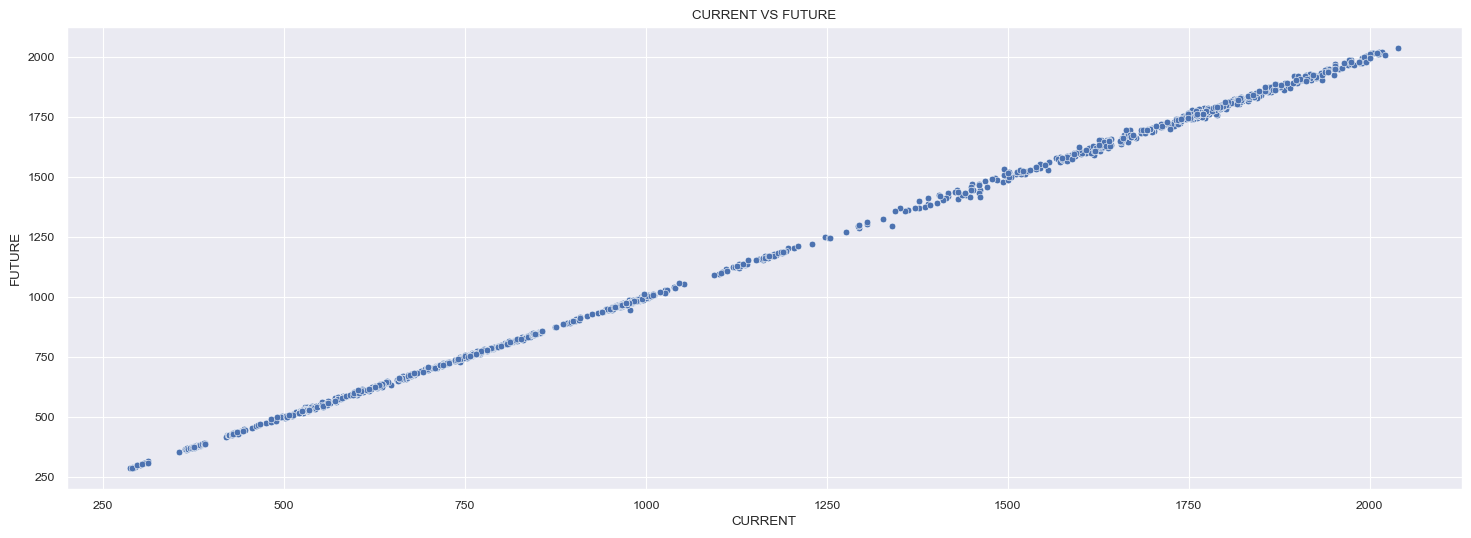

In [48]:
## PLOTTING THE SCATTER PLOT
plt.figure(figsize=(18,6))
plt.title('CURRENT VS FUTURE')
sns.scatterplot(data=OUTPUT,x="CURRENT",y="FUTURE");

In [49]:
data.shape

(1257, 6)

In [43]:
## MODEL SCORE OF THE DATASET
model.score(x,y)

0.9998421339498634